## Assignment 1: Building a Better Contact Sheet

In this assignment you are going to change the colors of the image, creating variations based on a single photo. There are many complex ways to change a photograph using variations, such as changing a black and white image to either "cool" variants, which have light purple and blues in them, or "warm" variants, which have touches of yellow and may look sepia toned. In this assignment, you'll be just changing the image one color channel at a time

Your assignment is to learn how to take this image

![Image_Challenge.png](Image_Challenge.png)

From the image you can see there are two parameters which are being varied for each sub-image. First, the rows are changed by color channel, where the top is the red channel, the middle is the green channel, and the bottom is the blue channel. Wait, why don't the colors look more red, green, and blue, in that order? Because the change you to be making is the ratio, or intensity, or that channel, in relationship to the other channels. We're going to use three different intensities, 0.1 (reduce the channel a lot), 0.5 (reduce the channel in half), and 0.9 (reduce the channel only a little bit).

For instance, a pixel represented as (200, 100, 50) is a sort of burnt orange color. So the top row of changes would create three alternative pixels, varying the first channel (red). one at (20, 100, 50), one at (100, 100, 50), and one at (180, 100, 50). The next row would vary the second channel (blue), and would create pixels of color values (200, 10, 50), (200, 50, 50) and (200, 90, 50).
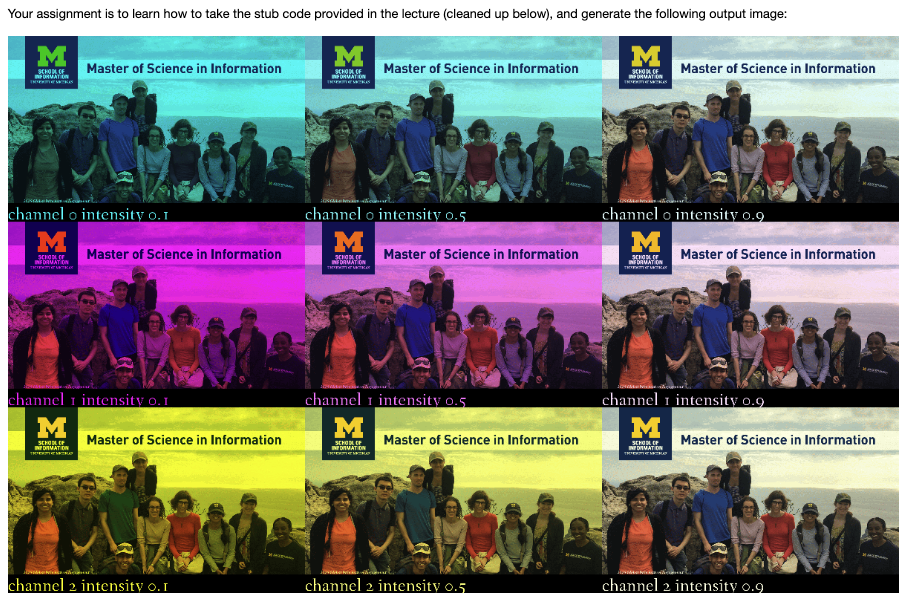

#### Import Libraries / Demo Contact Sheet
* This scaffolding allows a baseline to the `PIL` library
    * Contact Sheet will just be a PIL image that we set using a tuple for our second argument to set the 3x3 outset as defined by the problem
* When pasting into the contact sheet, we can similarly set the positioning of each by conditionaly updating the value of X in the below else statement to paste into each row. 
    * The y value would be set to the second row after x is == to the entire length of the contact sheet (third iteration) to allow for y to cascade down to further rows

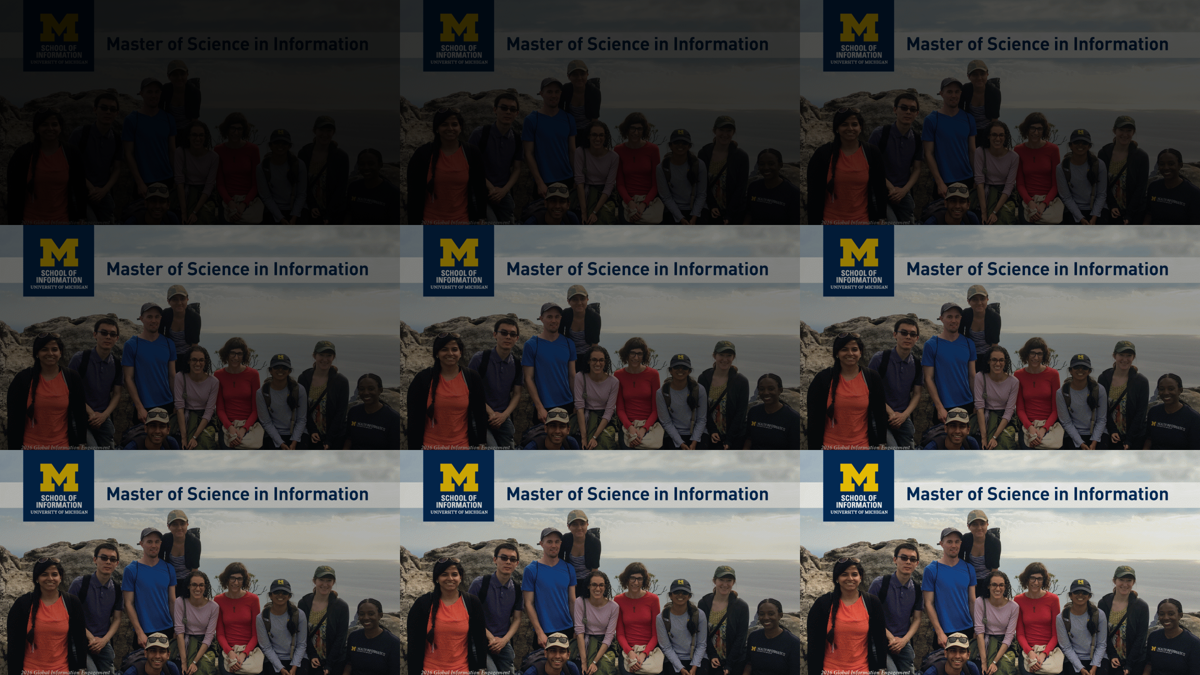

In [7]:
import PIL
from PIL import Image, ImageFont, ImageDraw, ImageEnhance, ImageColor

# read image and convert to RGB
image=Image.open("msi_recruitment_py_imaging.gif")
image=image.convert('RGB')

# build a list of 9 images which have different brightnesses
enhancer=ImageEnhance.Brightness(image)
images=[]
for i in range(1, 10):
    images.append(enhancer.enhance(i/10))

# create a contact sheet from different brightnesses
first_image=images[0]
contact_sheet=PIL.Image.new(first_image.mode, (first_image.width*3,first_image.height*3))
x=0
y=0

for img in images:
    # Lets paste the current image into the contact sheet
    contact_sheet.paste(img, (x, y) )
    # Now we update our X position. If it is going to be the width of the image, then we set it to 0
    # and update Y as well to point to the next "line" of the contact sheet.
    if x+first_image.width == contact_sheet.width:
        x=0
        y=y+first_image.height
    else:
        x=x+first_image.width

# resize and display the contact sheet
contact_sheet = contact_sheet.resize((int(contact_sheet.width/2),int(contact_sheet.height/2) ))
display(contact_sheet)

### Black Lower Band for Later Text
* We can concatenate images to create a black lower band for later text without writing over any of the original image. A default new image object will be black and we can similarly set the width and height with a tuple argument and will use our default image properties to do that.

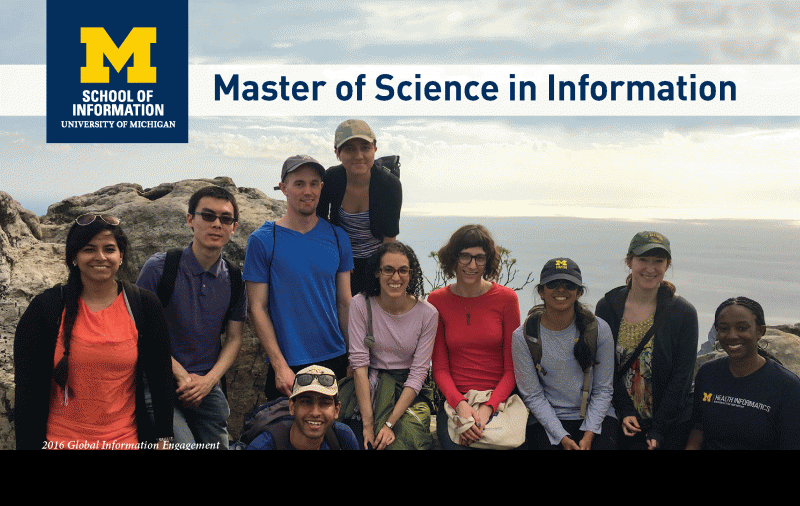

In [8]:
# Concatenate Images for black lower bottom for later text
from IPython.display import display

# And lets load the image we were working, and we can just convert it to RGB inline
file = "msi_recruitment_py_imaging.gif"
image = Image.open(file).convert('RGB')
black_box = Image.new('RGB', (image.width, int(image.height/8)))
concat_image = Image.new('RGB', (image.width, image.height + black_box.height))
concat_image.paste(image, (0, 0))
concat_image.paste(black_box, (0, image.height))


display(concat_image)

### Set Imaging Coloring & Text Setting 
* build a list of 9 images which have different channel colors
* Set Dictionary values for row/column type association for rgb setting in following loop and based on column value. Use secondary dictionary list values for text setting
* Set the r/g/b type as : use three different intensities, 0.1 (reduce the channel a lot), 0.5 (reduce the channel in half), and 0.9 (reduce the channel only a little bit)
* utilize the split method for the Image instance to dynamically alter the (r,g,b) of each image with a conditional capture and lambda function

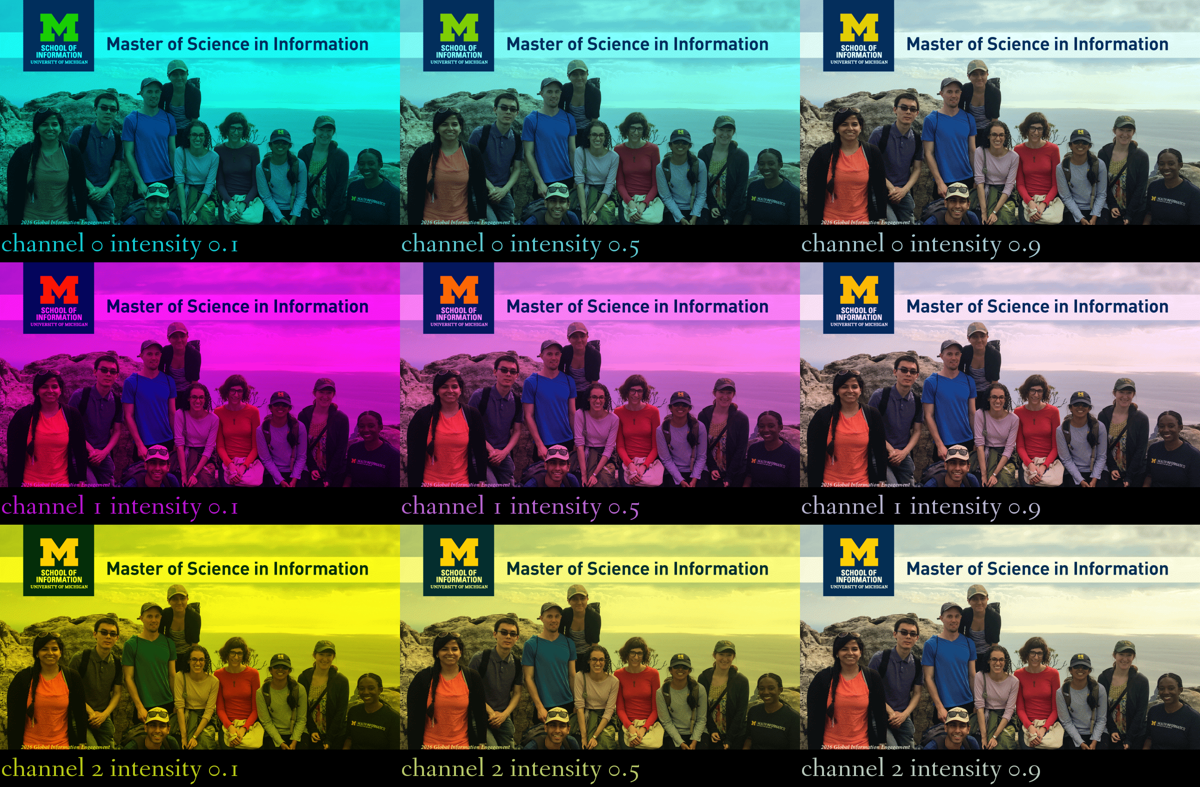

In [16]:
# read image and convert to RGB
image = Image.open("msi_recruitment_py_imaging.gif")
image = image.convert('RGB')

images_deux = []
img_idx_dict = {1:[0, 0.1], 2:[0, 0.5], 3:[0, 0.9], 4:[1, 0.1], 5:[1, 0.5], 6:[1, 0.9], 
                7:[2, 0.1], 8:[2, 0.5], 9:[2, 0.9]}

def black_box_image_combined(img):
    # Image new defaults to black (same width but just about an 1/8 of the hieght for the lower text)
    black_box = Image.new('RGB', (img.width, int(img.height/6)))
    # New image set to height of new additive black box height property
    concat_img = Image.new('RGB', (img.width, img.height + black_box.height))
    concat_img.paste(img, (0, 0))
    concat_img.paste(black_box, (0, img.height))
    #display(concat_img)
    return concat_img

for l in range(1, 10):
    # Use default image and add a black box (not cropping as will write in this box)
    concat_image = black_box_image_combined(image)
    # nifty way to use tuple association for the image splitting 
    r, g, b = concat_image.split()
    # use number type index to set image to be added to the array to loop through after for setting contact image
    # https://stackoverflow.com/questions/59320564/how-to-access-and-change-color-channels-using-pil
    if l in [1, 4, 7]:
        if l == 1:
            r = r.point(lambda i: i * .1)
        elif l == 4:
            g = g.point(lambda i: i * .1)
        else:
            b = b.point(lambda i: i * .1)
        img = Image.merge('RGB', (r, g, b))
        draw = ImageDraw.Draw(img)
        font_arg = ImageFont.truetype('fanwood-webfontpy_imaging.ttf', 55)
        draw.text((2, img.height - 60), text='channel {} intensity {}'.format(img_idx_dict[l][0], img_idx_dict[l][1]), 
                  font=font_arg, alignt='left', fill=img.getpixel((0,0)))
        images_deux.append(img)
    if l in [2, 5, 8]:
        if l == 2:
            r = r.point(lambda i: i * .5)
        elif l == 5:
            g = g.point(lambda i: i * .5)
        else:
            b = b.point(lambda i: i * .5)
        img = Image.merge('RGB', (r, g, b))
        draw = ImageDraw.Draw(img)
        font_arg = ImageFont.truetype('fanwood-webfontpy_imaging.ttf', 55)
        draw.text((2, img.height - 60), text='channel {} intensity {}'.format(img_idx_dict[l][0], img_idx_dict[l][1]), 
                  font=font_arg, alignt='left', fill=img.getpixel((0,0)))
        images_deux.append(img)
    if l in [3, 6, 9]:
        if l == 3:
            r = r.point(lambda i: i * .9)
        elif l == 6:
            g = g.point(lambda i: i * .9)
        else:
            b = b.point(lambda i: i * .9)
        img = Image.merge('RGB', (r, g, b))
        draw = ImageDraw.Draw(img)
        font_arg = ImageFont.truetype('fanwood-webfontpy_imaging.ttf', 55)
        draw.text((2, img.height - 60), text='channel {} intensity {}'.format(img_idx_dict[l][0], img_idx_dict[l][1]), 
                  font=font_arg, alignt='left', fill=img.getpixel((0,0)))
        images_deux.append(img)
    
# Use any image (just chose first) to set width and height properties for new contact sheet to paste into
first_image_2=images_deux[0]
# Create Contact Sheet
contact_sheet=PIL.Image.new(first_image_2.mode, (first_image_2.width*3,first_image_2.height*3))
x=0
y=0
        
for img in images_deux:
    # Lets paste the current image into the contact sheet
    contact_sheet.paste(img, (x, y) )
    # Now we update our X position. If it is going to be the width of the image, then we set it to 0
    # and update Y as well to point to the next "line" of the contact sheet.
    if x+first_image_2.width == contact_sheet.width:
        x=0
        y=y+first_image_2.height
    else:
        x=x+first_image_2.width

# resize and display the contact sheet
contact_sheet_2 = contact_sheet.resize((int(contact_sheet.width/2),int(contact_sheet.height/2) ))
display(contact_sheet_2)